In [66]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print('end')

end


In [67]:
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
# from pyimagesearch.lenet import LeNet
from imutils import paths
# import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
# from keras.datasets import mnist
# import numpy as np

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('photos')))
random.seed(13)
random.shuffle(imagePaths)
# print(imagePaths)

# loop over the input images
for imagePath in imagePaths:
	# print(imagePath)
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	# label = 1 if label == "santa" else 0
	labels.append(label)
    

# scale the raw pixel intensities to the range [0, 1]
# data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float32") / 255

x_train = np.array(data, dtype="float") / 255.0
x_test = np.array(data, dtype="float") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
labels = np.array(labels)
# Y_train = np_utils.to_categorical(labels, 4)

print(labels)

print('end')

[INFO] loading images...
['3' '2' '2' '2' '0' '2' '2' '0' '1' '1' '2' '1' '0' '3' '1' '1' '0' '0'
 '1' '2' '2' '2' '2' '1' '0' '3' '2' '1' '3' '3' '1' '1' '3' '0' '3' '1'
 '0' '3' '1' '0' '3' '0' '2' '0' '0' '3' '3' '3' '3' '0' '2' '1' '2' '0'
 '3' '3' '2' '1' '1']
end


In [68]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

print('end')

Train on 59 samples, validate on 59 samples
Epoch 1/1000
59/59 [==============================] - 1s 18ms/step - loss: 0.6945 - val_loss: 0.6938
Epoch 2/1000
59/59 [==============================] - 0s 898us/step - loss: 0.6936 - val_loss: 0.6931
Epoch 3/1000
59/59 [==============================] - 0s 831us/step - loss: 0.6930 - val_loss: 0.6926
Epoch 4/1000
59/59 [==============================] - 0s 915us/step - loss: 0.6925 - val_loss: 0.6922
Epoch 5/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.6921 - val_loss: 0.6918
Epoch 6/1000
59/59 [==============================] - 0s 864us/step - loss: 0.6917 - val_loss: 0.6915
Epoch 7/1000
59/59 [==============================] - 0s 932us/step - loss: 0.6914 - val_loss: 0.6911
Epoch 8/1000
59/59 [==============================] - 0s 881us/step - loss: 0.6910 - val_loss: 0.6908
Epoch 9/1000
59/59 [==============================] - 0s 831us/step - loss: 0.6907 - val_loss: 0.6904
Epoch 10/1000
59/59 [====================

59/59 [==============================] - 0s 678us/step - loss: 0.6191 - val_loss: 0.6186
Epoch 81/1000
59/59 [==============================] - 0s 814us/step - loss: 0.6186 - val_loss: 0.6182
Epoch 82/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.6178
Epoch 83/1000
59/59 [==============================] - 0s 729us/step - loss: 0.6177 - val_loss: 0.6174
Epoch 84/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.6173 - val_loss: 0.6169
Epoch 85/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.6169 - val_loss: 0.6165
Epoch 86/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.6165 - val_loss: 0.6161
Epoch 87/1000
59/59 [==============================] - 0s 881us/step - loss: 0.6160 - val_loss: 0.6156
Epoch 88/1000
59/59 [==============================] - 0s 949us/step - loss: 0.6155 - val_loss: 0.6151
Epoch 89/1000
59/59 [==============================] - 0s 915us/step - loss: 0.6151 - val_loss:

59/59 [==============================] - 0s 678us/step - loss: 0.5901 - val_loss: 0.5898
Epoch 160/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5898 - val_loss: 0.5896
Epoch 161/1000
59/59 [==============================] - 0s 712us/step - loss: 0.5896 - val_loss: 0.5895
Epoch 162/1000
59/59 [==============================] - 0s 644us/step - loss: 0.5894 - val_loss: 0.5893
Epoch 163/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5893 - val_loss: 0.5891
Epoch 164/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5891 - val_loss: 0.5889
Epoch 165/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5889 - val_loss: 0.5887
Epoch 166/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5887 - val_loss: 0.5886
Epoch 167/1000
59/59 [==============================] - 0s 898us/step - loss: 0.5886 - val_loss: 0.5884
Epoch 168/1000
59/59 [==============================] - 0s 898us/step - loss: 0.5

59/59 [==============================] - 0s 932us/step - loss: 0.5778 - val_loss: 0.5777
Epoch 239/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5777 - val_loss: 0.5775
Epoch 240/1000
59/59 [==============================] - 0s 881us/step - loss: 0.5775 - val_loss: 0.5774
Epoch 241/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.5774 - val_loss: 0.5773
Epoch 242/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5772 - val_loss: 0.5771
Epoch 243/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5771 - val_loss: 0.5770
Epoch 244/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.5768
Epoch 245/1000
59/59 [==============================] - ETA: 0s - loss: 0.572 - 0s 1ms/step - loss: 0.5768 - val_loss: 0.5767
Epoch 246/1000
59/59 [==============================] - 0s 932us/step - loss: 0.5767 - val_loss: 0.5766
Epoch 247/1000
59/59 [==============================] - 0s 1ms/step

59/59 [==============================] - 0s 966us/step - loss: 0.5681 - val_loss: 0.5680
Epoch 318/1000
59/59 [==============================] - 0s 712us/step - loss: 0.5680 - val_loss: 0.5679
Epoch 319/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5679 - val_loss: 0.5678
Epoch 320/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.5678 - val_loss: 0.5677
Epoch 321/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5677 - val_loss: 0.5676
Epoch 322/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5676 - val_loss: 0.5675
Epoch 323/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5675 - val_loss: 0.5674
Epoch 324/1000
59/59 [==============================] - 0s 932us/step - loss: 0.5674 - val_loss: 0.5673
Epoch 325/1000
59/59 [==============================] - 0s 864us/step - loss: 0.5673 - val_loss: 0.5673
Epoch 326/1000
59/59 [==============================] - 0s 831us/step - loss: 0.5672 

Epoch 396/1000
59/59 [==============================] - 0s 627us/step - loss: 0.5622 - val_loss: 0.5622
Epoch 397/1000
59/59 [==============================] - 0s 729us/step - loss: 0.5622 - val_loss: 0.5621
Epoch 398/1000
59/59 [==============================] - 0s 644us/step - loss: 0.5621 - val_loss: 0.5621
Epoch 399/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5621 - val_loss: 0.5620
Epoch 400/1000
59/59 [==============================] - 0s 763us/step - loss: 0.5620 - val_loss: 0.5620
Epoch 401/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5620 - val_loss: 0.5619
Epoch 402/1000
59/59 [==============================] - 0s 712us/step - loss: 0.5620 - val_loss: 0.5619
Epoch 403/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5619 - val_loss: 0.5618
Epoch 404/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5618 - val_loss: 0.5618
Epoch 405/1000
59/59 [==============================] - 0s 932us/s

Epoch 475/1000
59/59 [==============================] - 0s 729us/step - loss: 0.5595 - val_loss: 0.5594
Epoch 476/1000
59/59 [==============================] - 0s 729us/step - loss: 0.5594 - val_loss: 0.5594
Epoch 477/1000
59/59 [==============================] - 0s 661us/step - loss: 0.5594 - val_loss: 0.5594
Epoch 478/1000
59/59 [==============================] - 0s 661us/step - loss: 0.5594 - val_loss: 0.5594
Epoch 479/1000
59/59 [==============================] - 0s 729us/step - loss: 0.5594 - val_loss: 0.5594
Epoch 480/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5594 - val_loss: 0.5593
Epoch 481/1000
59/59 [==============================] - 0s 780us/step - loss: 0.5593 - val_loss: 0.5593
Epoch 482/1000
59/59 [==============================] - 0s 915us/step - loss: 0.5593 - val_loss: 0.5593
Epoch 483/1000
59/59 [==============================] - 0s 966us/step - loss: 0.5593 - val_loss: 0.5593
Epoch 484/1000
59/59 [==============================] - 0s 780us/s

Epoch 554/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5580 - val_loss: 0.5580
Epoch 555/1000
59/59 [==============================] - 0s 746us/step - loss: 0.5580 - val_loss: 0.5580
Epoch 556/1000
59/59 [==============================] - 0s 746us/step - loss: 0.5580 - val_loss: 0.5579
Epoch 557/1000
59/59 [==============================] - 0s 661us/step - loss: 0.5579 - val_loss: 0.5579
Epoch 558/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5579 - val_loss: 0.5579
Epoch 559/1000
59/59 [==============================] - 0s 864us/step - loss: 0.5579 - val_loss: 0.5579
Epoch 560/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5579 - val_loss: 0.5579
Epoch 561/1000
59/59 [==============================] - 0s 966us/step - loss: 0.5579 - val_loss: 0.5579
Epoch 562/1000
59/59 [==============================] - 0s 881us/step - loss: 0.5579 - val_loss: 0.5578
Epoch 563/1000
59/59 [==============================] - 0s 1ms/s

Epoch 633/1000
59/59 [==============================] - 0s 695us/step - loss: 0.5568 - val_loss: 0.5568
Epoch 634/1000
59/59 [==============================] - 0s 729us/step - loss: 0.5568 - val_loss: 0.5568
Epoch 635/1000
59/59 [==============================] - 0s 661us/step - loss: 0.5568 - val_loss: 0.5567
Epoch 636/1000
59/59 [==============================] - 0s 661us/step - loss: 0.5568 - val_loss: 0.5567
Epoch 637/1000
59/59 [==============================] - 0s 898us/step - loss: 0.5567 - val_loss: 0.5567
Epoch 638/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5567 - val_loss: 0.5567
Epoch 639/1000
59/59 [==============================] - 0s 1ms/step - loss: 0.5567 - val_loss: 0.5567
Epoch 640/1000
59/59 [==============================] - 0s 780us/step - loss: 0.5567 - val_loss: 0.5567
Epoch 641/1000
59/59 [==============================] - 0s 848us/step - loss: 0.5567 - val_loss: 0.5567
Epoch 642/1000
59/59 [==============================] - 0s 797us/s

59/59 [==============================] - 0s 661us/step - loss: 0.5556 - val_loss: 0.5556
Epoch 712/1000
59/59 [==============================] - 0s 780us/step - loss: 0.5556 - val_loss: 0.5556
Epoch 713/1000
59/59 [==============================] - 0s 610us/step - loss: 0.5556 - val_loss: 0.5556
Epoch 714/1000
59/59 [==============================] - 0s 729us/step - loss: 0.5556 - val_loss: 0.5556
Epoch 715/1000
59/59 [==============================] - 0s 780us/step - loss: 0.5556 - val_loss: 0.5555
Epoch 716/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5555 - val_loss: 0.5555
Epoch 717/1000
59/59 [==============================] - 0s 780us/step - loss: 0.5555 - val_loss: 0.5555
Epoch 718/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5555 - val_loss: 0.5555
Epoch 719/1000
59/59 [==============================] - 0s 831us/step - loss: 0.5555 - val_loss: 0.5555
Epoch 720/1000
59/59 [==============================] - 0s 797us/step - loss: 0

Epoch 790/1000
59/59 [==============================] - 0s 712us/step - loss: 0.5544 - val_loss: 0.5544
Epoch 791/1000
59/59 [==============================] - 0s 763us/step - loss: 0.5544 - val_loss: 0.5544
Epoch 792/1000
59/59 [==============================] - 0s 627us/step - loss: 0.5544 - val_loss: 0.5543
Epoch 793/1000
59/59 [==============================] - 0s 881us/step - loss: 0.5544 - val_loss: 0.5543
Epoch 794/1000
59/59 [==============================] - 0s 949us/step - loss: 0.5543 - val_loss: 0.5543
Epoch 795/1000
59/59 [==============================] - 0s 831us/step - loss: 0.5543 - val_loss: 0.5543
Epoch 796/1000
59/59 [==============================] - 0s 881us/step - loss: 0.5543 - val_loss: 0.5543
Epoch 797/1000
59/59 [==============================] - 0s 898us/step - loss: 0.5543 - val_loss: 0.5543
Epoch 798/1000
59/59 [==============================] - 0s 949us/step - loss: 0.5543 - val_loss: 0.5543
Epoch 799/1000
59/59 [==============================] - 0s 881us

Epoch 869/1000
59/59 [==============================] - 0s 712us/step - loss: 0.5532 - val_loss: 0.5532
Epoch 870/1000
59/59 [==============================] - 0s 627us/step - loss: 0.5532 - val_loss: 0.5532
Epoch 871/1000
59/59 [==============================] - 0s 881us/step - loss: 0.5532 - val_loss: 0.5531
Epoch 872/1000
59/59 [==============================] - 0s 797us/step - loss: 0.5531 - val_loss: 0.5531
Epoch 873/1000
59/59 [==============================] - 0s 898us/step - loss: 0.5531 - val_loss: 0.5531
Epoch 874/1000
59/59 [==============================] - 0s 949us/step - loss: 0.5531 - val_loss: 0.5531
Epoch 875/1000
59/59 [==============================] - 0s 966us/step - loss: 0.5531 - val_loss: 0.5531
Epoch 876/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5531 - val_loss: 0.5531
Epoch 877/1000
59/59 [==============================] - 0s 763us/step - loss: 0.5531 - val_loss: 0.5530
Epoch 878/1000
59/59 [==============================] - 0s 932us

Epoch 948/1000
59/59 [==============================] - 0s 763us/step - loss: 0.5521 - val_loss: 0.5521
Epoch 949/1000
59/59 [==============================] - 0s 746us/step - loss: 0.5521 - val_loss: 0.5520
Epoch 950/1000
59/59 [==============================] - 0s 763us/step - loss: 0.5521 - val_loss: 0.5520
Epoch 951/1000
59/59 [==============================] - 0s 610us/step - loss: 0.5520 - val_loss: 0.5520
Epoch 952/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5520 - val_loss: 0.5520
Epoch 953/1000
59/59 [==============================] - 0s 915us/step - loss: 0.5520 - val_loss: 0.5520
Epoch 954/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5520 - val_loss: 0.5520
Epoch 955/1000
59/59 [==============================] - 0s 915us/step - loss: 0.5520 - val_loss: 0.5520
Epoch 956/1000
59/59 [==============================] - 0s 814us/step - loss: 0.5520 - val_loss: 0.5519
Epoch 957/1000
59/59 [==============================] - 0s 881us

In [23]:
# model_json = model.to_json()
# json_file = open("photos_model.json", "w")
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
autoencoder.save_weights("photos_copy.h5")

In [24]:

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [69]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)
print(encoded_imgs[0])
print(encoded_imgs)

# mean = encoded_imgs.mean(axis=0)
# std = encoded_imgs.std(axis=0)
# encoded_imgs -= mean
# encoded_imgs /= std
# print(encoded_imgs[0])


print('end')

[0.0000000e+00 3.9130912e+00 0.0000000e+00 1.8572196e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.0228403e-01 4.2380795e+00 2.0815015e+00 0.0000000e+00
 0.0000000e+00 3.1584990e-01 2.7914956e+00 9.6533072e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.0424151e+00 0.0000000e+00 0.0000000e+00
 1.0275068e+00 5.2823985e-01 0.0000000e+00 7.8265829e+00 1.2930619e+00
 6.0591623e-03 3.2437989e-01]
[[0.0000000e+00 3.9130912e+00 0.0000000e+00 ... 1.2930619e+00
  6.0591623e-03 3.2437989e-01]
 [2.9752233e+00 3.1366584e+00 0.0000000e+00 ... 1.0975564e+00
  0.0000000e+00 5.2599607e+00]
 [3.7600586e+00 2.9813030e+00 0.0000000e+00 ... 1.3708086e+00
  0.0000000e+00 5.9729328e+00]
 ...
 [3.5522988e+00 2.6382010e+00 0.0000000e+00 ... 1.3420084e+00
  0.0000000e+00 5.7187958e+00]
 [1.5828104e+00 4.7130316e-01 0.0000000e+00 ... 3.5210886e+00
  1.2789012e+01 0.0000000e+00]
 [1.5432047e+00 5.4852223e-01 0.0000000e+00 ... 3.5309701e+00
  1.2602270e

In [70]:
import numpy
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import np_utils

# numpy.random.seed(59)

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

# Y_train = np_utils.to_categorical(y_train, 4)
# Y_test = np_utils.to_categorical(y_test, 4)

X_train = encoded_imgs
Y_train = np_utils.to_categorical(labels, 4)

# print(X_train)
# print(Y_train)

model = Sequential()

model.add(Dense(32, input_dim=32, init="normal", activation="relu"))
model.add(Dense(4, init="normal", activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD",  metrics=["accuracy"])

print(model.summary())



C:\Users\Any\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=32, activation="relu", kernel_initializer="normal")`
C:\Users\Any\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="softmax", kernel_initializer="normal")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 132       
Total params: 1,188
Trainable params: 1,188
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
model.fit(X_train,
          Y_train,
         batch_size=32,
         nb_epoch=100,
          shuffle=True,
         verbose=1)

# scores = model.evaluate(X_test, Y_test, verbose=0)
# print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

C:\Users\Any\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
59/59 [==============================] - 1s 14ms/step - loss: 1.4083 - acc: 0.0000e+00
Epoch 2/100
59/59 [==============================] - 0s 356us/step - loss: 1.3905 - acc: 0.0000e+00
Epoch 3/100
59/59 [==============================] - 0s 220us/step - loss: 1.3723 - acc: 0.0000e+00
Epoch 4/100
59/59 [==============================] - 0s 407us/step - loss: 1.3550 - acc: 0.2203
Epoch 5/100
59/59 [==============================] - 0s 322us/step - loss: 1.3387 - acc: 0.5085
Epoch 6/100
59/59 [==============================] - 0s 322us/step - loss: 1.3209 - acc: 0.5085
Epoch 7/100
59/59 [==============================] - 0s 322us/step - loss: 1.3034 - acc: 0.5085
Epoch 8/100
59/59 [==============================] - 0s 305us/step - loss: 1.2859 - acc: 0.5085
Epoch 9/100
59/59 [==============================] - 0s 356us/step - loss: 1.2671 - acc: 0.5085
Epoch 10/100
59/59 [==============================] - 0s 542us/step - loss: 1.2486 - acc: 0.5254
Epoch 11/100
59/59 [========

59/59 [==============================] - 0s 322us/step - loss: 0.2037 - acc: 1.0000
Epoch 86/100
59/59 [==============================] - 0s 373us/step - loss: 0.1993 - acc: 1.0000
Epoch 87/100
59/59 [==============================] - 0s 254us/step - loss: 0.1954 - acc: 1.0000
Epoch 88/100
59/59 [==============================] - 0s 305us/step - loss: 0.1908 - acc: 1.0000
Epoch 89/100
59/59 [==============================] - 0s 424us/step - loss: 0.1862 - acc: 1.0000
Epoch 90/100
59/59 [==============================] - 0s 492us/step - loss: 0.1823 - acc: 1.0000
Epoch 91/100
59/59 [==============================] - 0s 220us/step - loss: 0.1790 - acc: 1.0000
Epoch 92/100
59/59 [==============================] - 0s 678us/step - loss: 0.1750 - acc: 1.0000
Epoch 93/100
59/59 [==============================] - 0s 356us/step - loss: 0.1704 - acc: 1.0000
Epoch 94/100
59/59 [==============================] - 0s 305us/step - loss: 0.1670 - acc: 1.0000
Epoch 95/100
59/59 [=======================

[30  4 33 14 53 25 45 19 37 36 20  7 56 35  3  0 18 13 28 40  1 51 17  2
 49 32 43 23 15 31  9 27 21  8  5 44 11 39 34 26 55 22  6 42 57 58 12 48
 38 16 24 10 50 52 29 47 41 46 54]
[0 1 0 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 0 0 1]
[1 0 0 0]


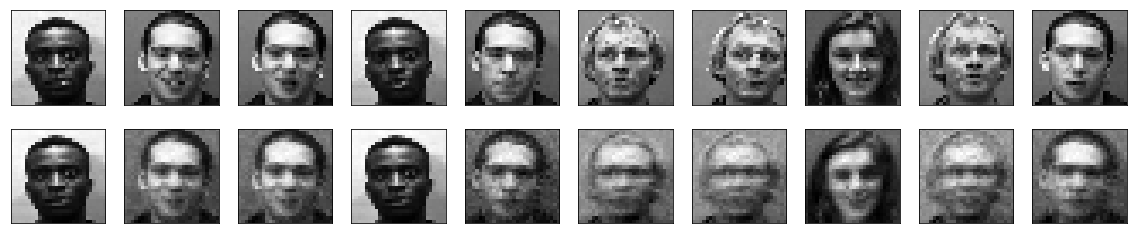

[[0.1629786  0.03455371 0.01280911 0.7896586 ]
 [0.08988053 0.01085441 0.8777125  0.02155259]
 [0.02883837 0.00460162 0.9603014  0.00625866]
 [0.03669275 0.00694022 0.94729877 0.00906824]
 [0.83210254 0.00500512 0.02724385 0.13564844]
 [0.03198569 0.00528028 0.95559573 0.00713832]
 [0.02154984 0.00441795 0.9691105  0.00492165]
 [0.8486096  0.00428994 0.02038169 0.1267187 ]
 [0.00166005 0.966735   0.00139928 0.03020566]
 [0.00187973 0.962965   0.00157546 0.0335798 ]
 [0.02328149 0.00451287 0.96689916 0.00530652]
 [0.00154226 0.96831536 0.00134114 0.02880121]
 [0.75100344 0.01289794 0.0347313  0.20136729]
 [0.16379537 0.03758655 0.013143   0.7854751 ]
 [0.00153397 0.96842515 0.00134466 0.02869626]
 [0.00155768 0.9682192  0.00140532 0.02881767]
 [0.82256263 0.00514246 0.0236318  0.1486631 ]
 [0.77866405 0.01112861 0.03947043 0.1707369 ]
 [0.00155494 0.9677935  0.00134637 0.02930517]
 [0.04027832 0.00688149 0.9432028  0.00963743]
 [0.04102962 0.0150934  0.9296304  0.01424661]
 [0.04004822 

In [75]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np


# encoded_imgs = encoder.predict(x_test)

# decoded_imgs = decoder.predict(encoded_imgs)

# Y_train = np_utils.to_categorical(labels, 4)

prediction = model.predict(encoded_imgs)

categorical_class = (prediction == prediction.max(axis=1, keepdims=True)).astype(int)
# print(categorical_class)
n = 10  # how many digits we will display
indexes = np.random.permutation(59)
print(indexes)
# random.seed(59)
# random.shuffle(imagePaths)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    # print(x_test[i])
    # prediction = model.predict(encoded_imgs[i])
    # categorical_class = np_utils.categorical_probas_to_classes(prediction)
    print(categorical_class[indexes[i]])
    plt.imshow(x_test[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print(prediction)
